## Loan Default Risk Using Financial and Demographic Data

### Introduction

Industries around the world who deal on financial loan services such as banks, Financial Institutions and even Governments face challengies in knowing who is the right person or entity to give out its loans to. They try to reduce loan repayment defaults by all means possible. Now they can do this with the help of Machine Learning, to help predict which individuals are at the highest risk of defaulting on their Loans. 

This is where I will be helping with the use of Machine Learning in reducing the rate of these defaults. 

I will also be creating a User Interface after producing a model which can be easily used by Individuals or Financial Institutions.

### Description


This Dataset has been taken from Kaggle - Loan Default Prediction Challenge - This will be used in making this model and creating a User Interface (UI) for easy prediction by any individual and financial Institution that may want to use it. 

### Features

![My Image](features.png)

## Let's Begin

#### Import some of the neccessary Libraries: 

In [5]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import geopandas as gpd          # Python Geospatial Data Library
# plt.style.use('fivethirtyeight')
# %matplotlib inline

# '''Spatial Visualizations'''
# import folium
# import folium.plugins


#### Import my Data and do Data Inspection

In [6]:
# place my data in a dataframe
data = pd.read_csv('Loan_default.csv')

In [7]:
# Inspecting my data 
data.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

In [8]:
data.tail(3)

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
255344  XQK1UUUNGP   56   84820      208294          597              70   
255345  JAO28CPL4H   42   85109       60575          809              40   
255346  ZTH91CGL0B   62   22418       18481          636             113   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
255344               3          5.29        60      0.50  High School   
255345               1         20.90        48      0.44  High School   
255346               2          6.73        12      0.48   Bachelor's   

       EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
255344  Self-employed       Married         Yes           Yes        Auto   
255345      Part-time        Single         Yes           Yes       Other   
255346     Unemployed      Divorced         Yes            No   Education   

       HasCoSigner  Default  
255344         Yes        0  
255345          No        0  
255346         Yes        0

In [9]:
# Describing my data
data.describe()

Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000        2.000000       7.770000      24.000000   
50%         60.000000        2.000000      13.460000      36.000000   
75%         90.000000        3.000000      19.250000      48.000000   
max        119.000000        4.000000      25.000000      60.000000   

            DTIRatio        Default  
count  255347.000000  255347.000000  
mean        0.500212       0.116128  
std         0.230917       0.320379  
min         0.100000       0.000000  
25%         0.300000       0.000000  
50%         0.500000       0.000000  
75%         0.700000       0.000000  
max         0.900000       1.000000

In [10]:
# Feature and data types: 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

Dealing with Missing Values if any: 

In [11]:
#Checking for missing values in my data: 
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

AS we can see Above There are no missing values in my dataset

### We do some more EDA

In [12]:
# making a check point so I can work freely with the data 
# Making a copy of my data for exploration and preprocessing 
data1 = data.copy()

In [13]:
data1.head(3)

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio   Education  \
0               4         15.23        36      0.44  Bachelor's   
1               1          4.81        60      0.68    Master's   
2               3         21.17        24      0.31    Master's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1

In [14]:
# Lets drop the LoanID column as it has no relevance in our dataset
data1 = data1.drop(['LoanID'], axis=1)

In [15]:
# Data check one more time to see if the loanID is gone
data1.head(3)

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   

   InterestRate  LoanTerm  DTIRatio   Education EmploymentType MaritalStatus  \
0         15.23        36      0.44  Bachelor's      Full-time      Divorced   
1          4.81        60      0.68    Master's      Full-time       Married   
2         21.17        24      0.31    Master's     Unemployed      Divorced   

  HasMortgage HasDependents LoanPurpose HasCoSigner  Default  
0         Yes           Yes       Other         Yes        0  
1          No            No       Other         Yes        0  
2         Yes           Yes        Auto          No        1

<Axes: xlabel='InterestRate', ylabel='Default'>

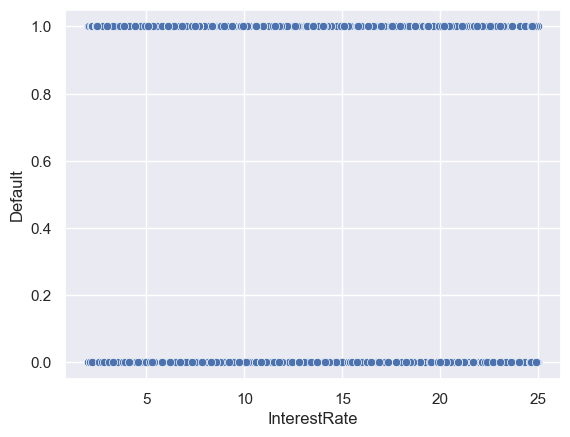

In [16]:
# Scatter plots for credit score vs numCredit Lines

sns.scatterplot(x = 'InterestRate', y = 'Default', data = data1)

<Axes: xlabel='count', ylabel='LoanPurpose'>

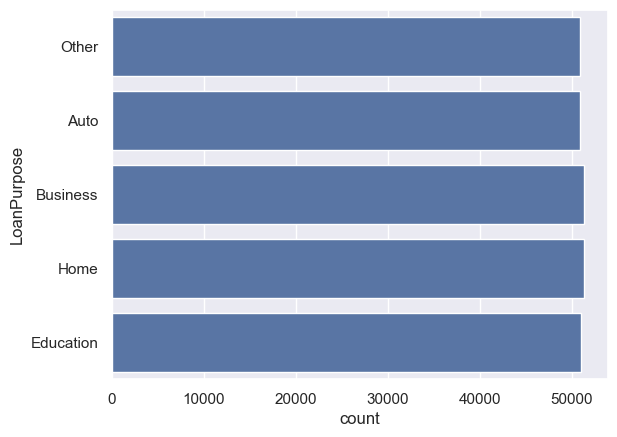

In [17]:
sns.countplot(data1['LoanPurpose'])

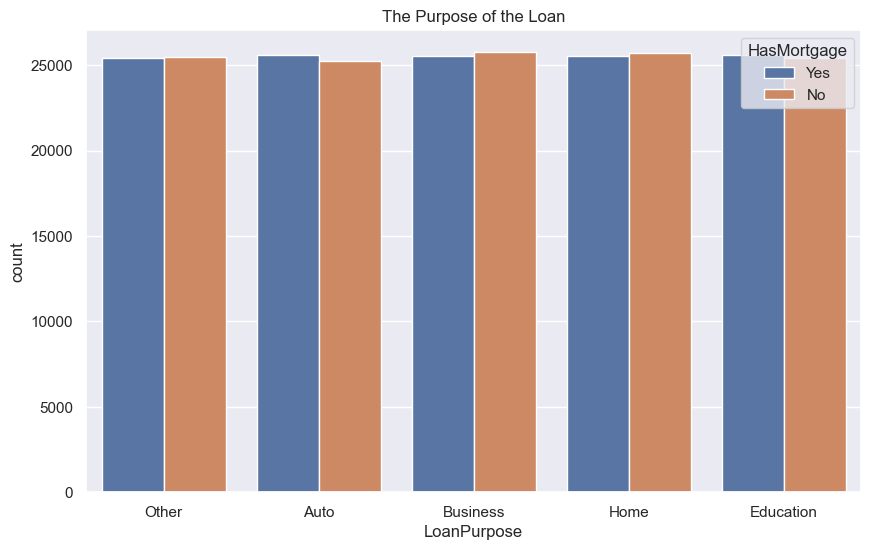

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'LoanPurpose', hue = "HasMortgage", data = data1)
plt.title("The Purpose of the Loan")
plt.show()

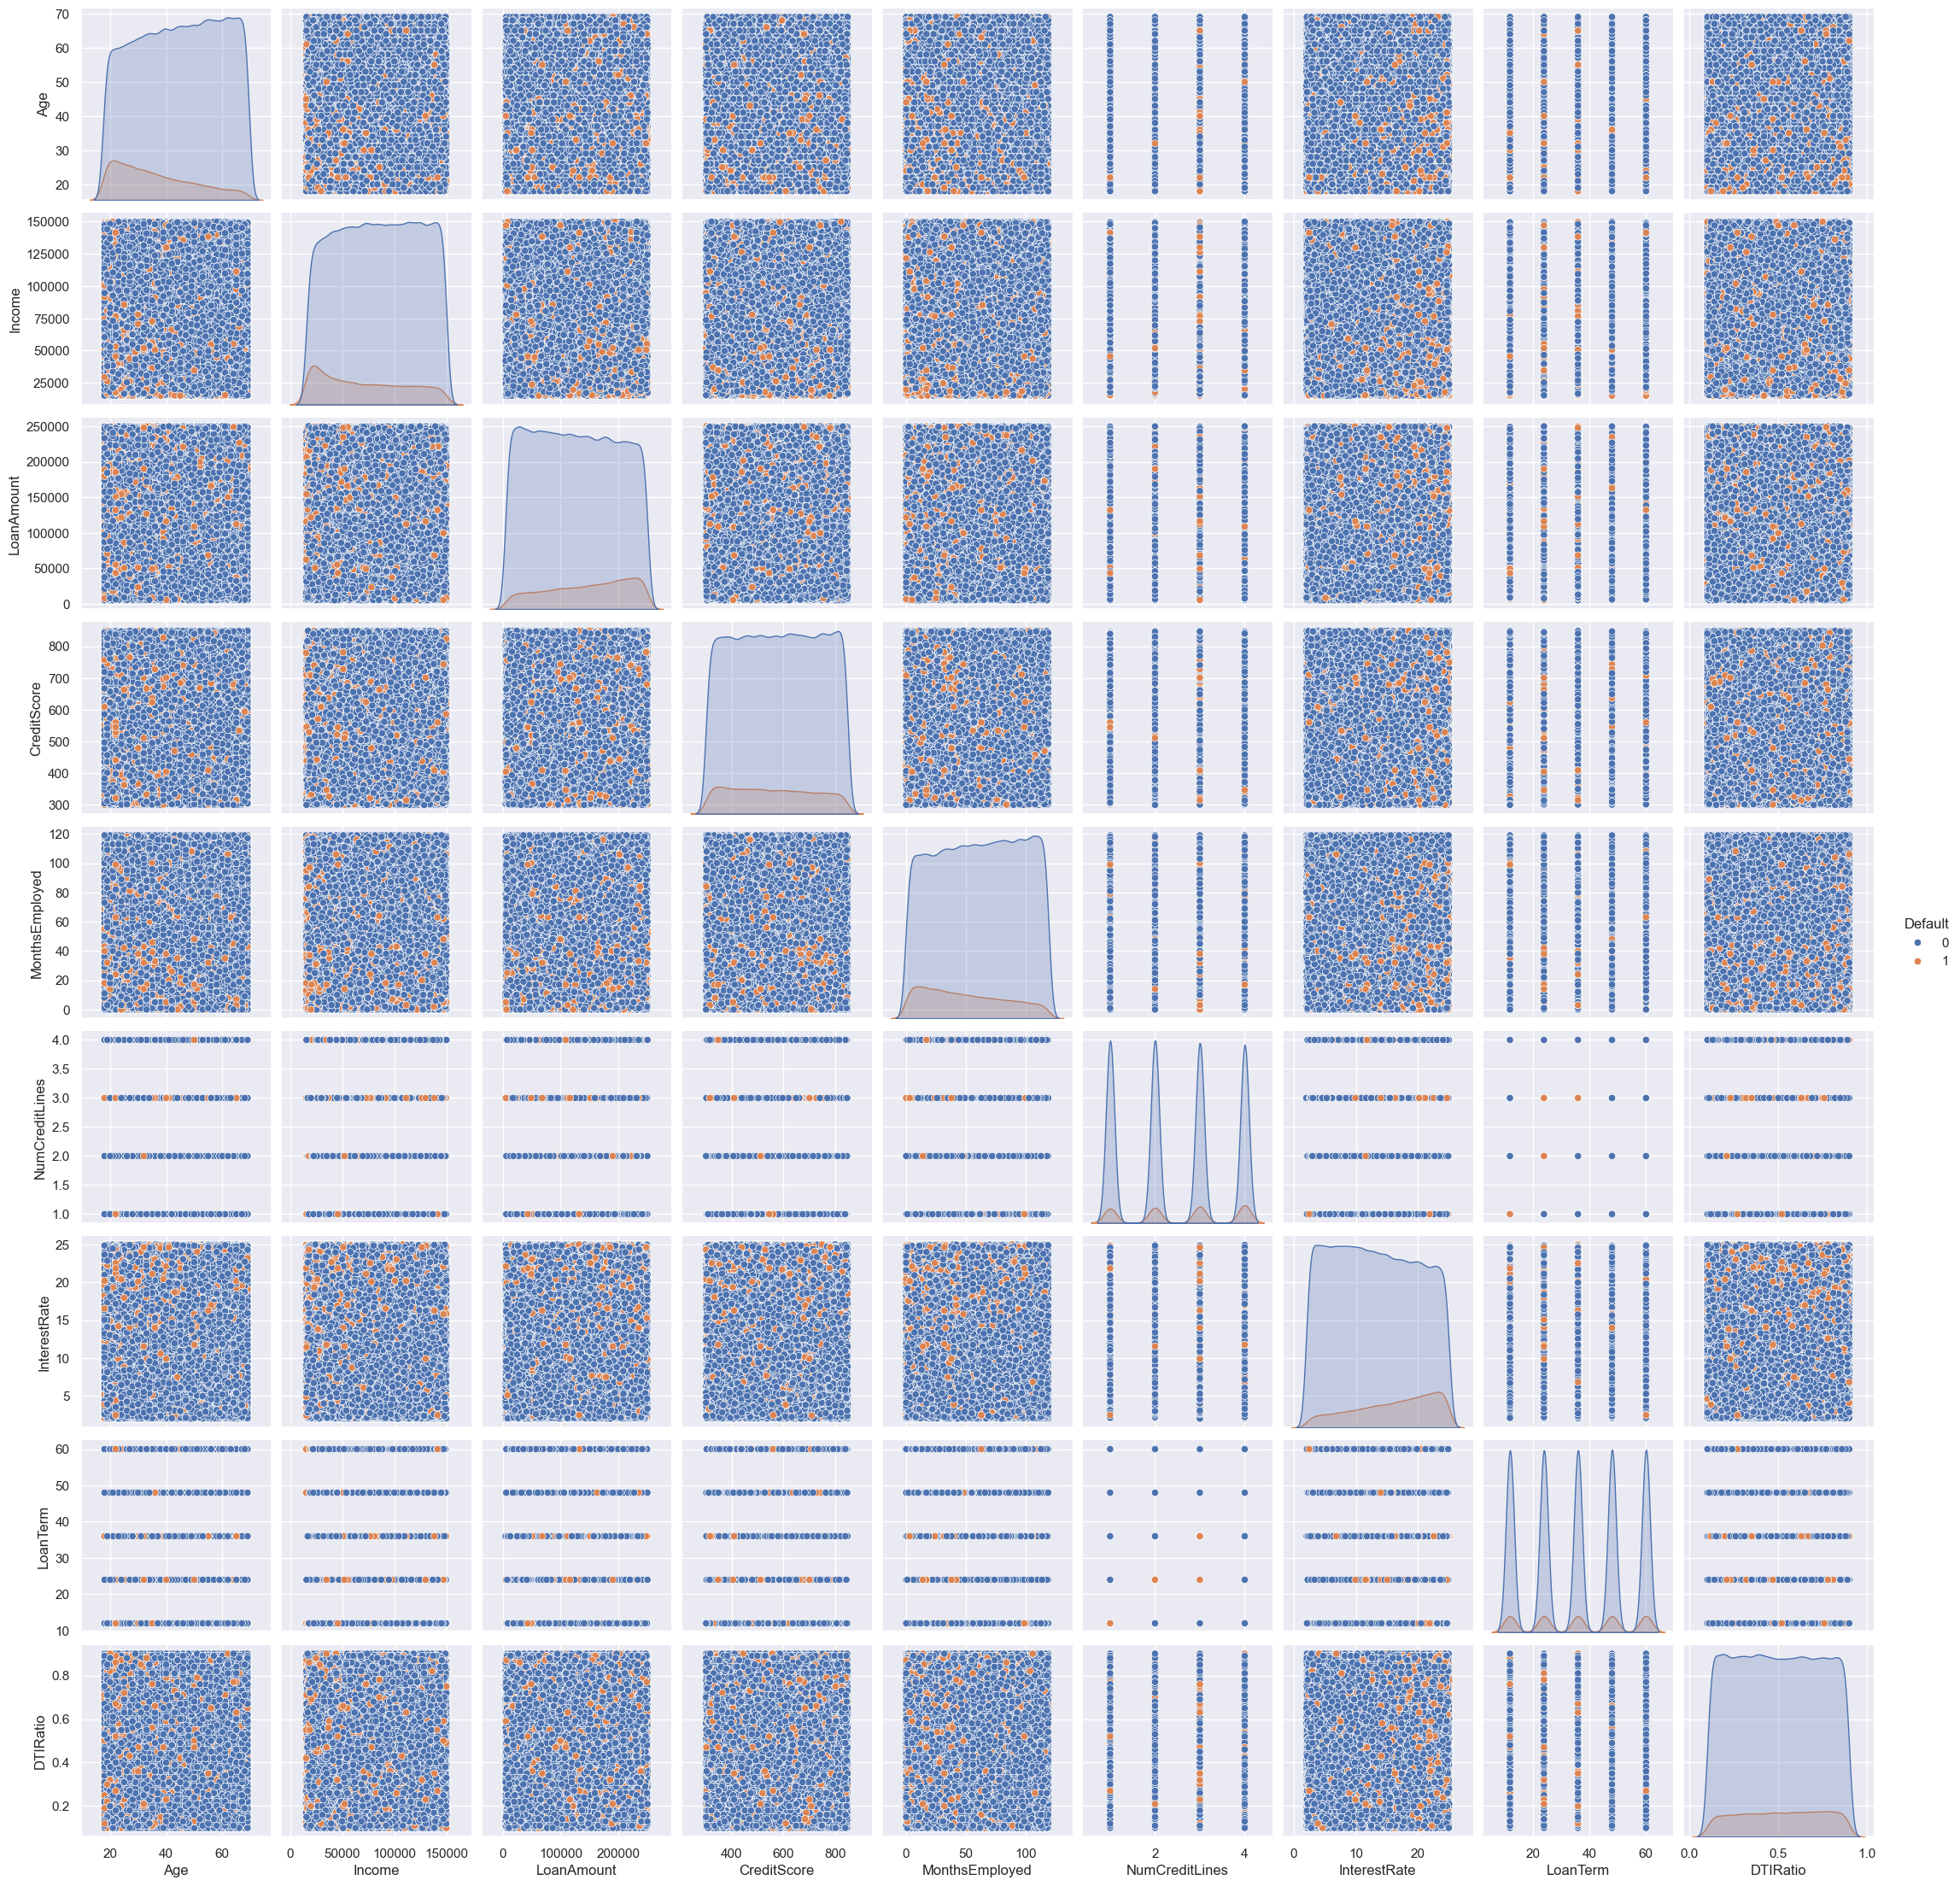

In [19]:
sns.pairplot(data1, hue = "Default")
plt.show()

## Data PreProcessing

In [21]:
# Lets view our data
data1.head(5)

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio    Education EmploymentType MaritalStatus  \
0         15.23        36      0.44   Bachelor's      Full-time      Divorced   
1          4.81        60      0.68     Master's      Full-time       Married   
2         21.17        24      0.31     Master's     Unemployed      Divorced   
3          7.07        24      0.23  High School      Full-time       Married   
4          6.51        48      0.73   Bachelor's     Unemployed      Divorced   

  HasMortgage HasDependents LoanPurpose HasCoSigner  Default  
0         Yes           Yes       Other         Yes        0  
1          No            No       Other         Yes        0  
2         Yes           Yes        Auto          No        1  
3          No            No    Business          No        0  
4          No           Yes        Auto          No        0

As can be seen our data cannot be used for training a model becuase of the sting values cannot be put into our model training. So we have to use sklearn label encoder

In [22]:
# So Lets Encode our data using LabelEncoder
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
obj_col = ['HasCoSigner','LoanPurpose','HasDependents', 'HasMortgage','MaritalStatus', 'EmploymentType', 'Education']
for col in obj_col:
    data1[col] = le.fit_transform(data1[col])
    


In [23]:
# Now lets see how oue data have transformed:
data1.head(6)

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   
5   25   90298       90448          720              18               2   

   InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  \
0         15.23        36      0.44          0               0              0   
1          4.81        60      0.68          2               0              1   
2         21.17        24      0.31          2               3              0   
3          7.07        24      0.23          1               0              1   
4          6.51        48      0.73          0               3              0   
5         22.72        24      0.10          1               3              2   

   HasMortgage  HasDependents  LoanPurpose  HasCoSigner  Default  
0            1              1            4            1        0  
1            0              0            4            1        0  
2            1              1            0            0        1  
3            0              0            1            0        0  
4            0              1            0            0        0  
5            1              0            1            1        1

Checking if our data correlates with the target 


In [24]:
corr = data1.corrwith(data1['Default'])
print(corr.sort_values(ascending=False))

Default           1.000000
InterestRate      0.131273
LoanAmount        0.086659
EmploymentType    0.041010
NumCreditLines    0.028330
DTIRatio          0.019236
LoanTerm          0.000545
MaritalStatus    -0.007902
LoanPurpose      -0.010096
Education        -0.022835
HasMortgage      -0.022856
CreditScore      -0.034166
HasDependents    -0.034678
HasCoSigner      -0.039109
MonthsEmployed   -0.097374
Income           -0.099119
Age              -0.167783
dtype: float64


## Preparing to Train my Model

In [25]:
# Marking my dependent and independent variables 
X = data1.drop(['Default'], axis = 1)
X.head(2)

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   

   InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  \
0         15.23        36      0.44          0               0              0   
1          4.81        60      0.68          2               0              1   

   HasMortgage  HasDependents  LoanPurpose  HasCoSigner  
0            1              1            4            1  
1            0              0            4            1

In [26]:
# My Target data which is the Default is now extracted to y
y = data1['Default']

In [27]:
# Lets Inspect y:
y.head(3)

0    0
1    0
2    1
Name: Default, dtype: int64

## Splitting my Data into Training and Testing Dataset

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [30]:
# Checking the amount of our Train Data
len(X_train)

204277

In [31]:
# Checking the amount of our Test Data
len(X_test)

51070

##  Taking Four Different Models - Classifiers

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [33]:
models = [
    RandomForestClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB()
    
]


for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    model_name = model.__class__.__name__
    print(f'{model_name} - Precisión: {score:.2f}')

RandomForestClassifier - Precisión: 0.89
LogisticRegression - Precisión: 0.88
KNeighborsClassifier - Precisión: 0.87
GaussianNB - Precisión: 0.88


In [34]:
# One more classifier
from sklearn.tree import DecisionTreeClassifier


In [35]:
myModel = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=5, min_samples_leaf=5)
myModel.fit(X_train, y_train)
model_name = myModel.__class__.__name__
print(f'{model_name} - Precisión: {score:.2f}')

DecisionTreeClassifier - Precisión: 0.88


Lets Save our Model 

In [36]:
# First we import Pickle Library
import pickle

In [37]:
# Save Model Using Pickle
with open("model.pkl", "wb") as model_file:
    pickle.dump(myModel, model_file)

## Congtatulation! Our Model has been trained

### From our training it can be seen that Random Forrest Classifier gave us the best precision of 89%

### We will use this model in creating our User Interface

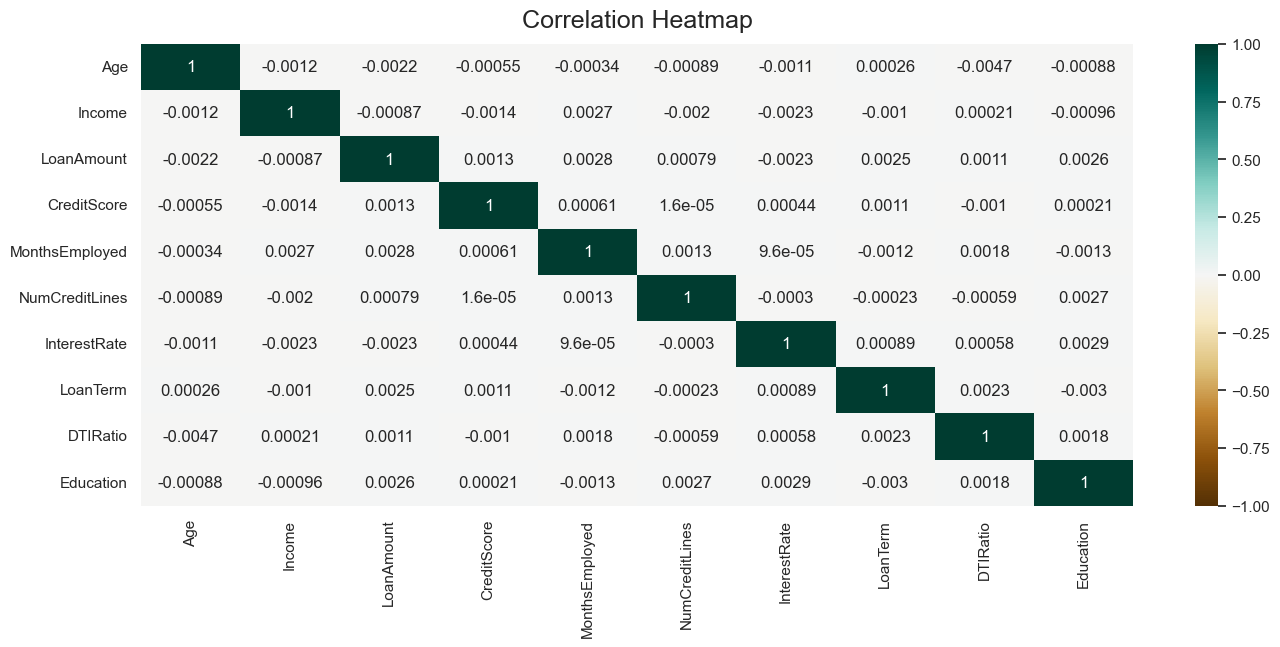

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data1[data1.columns[:10]].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()
plt.savefig('fig6.png')

[[45151    19]
 [ 5862    38]]


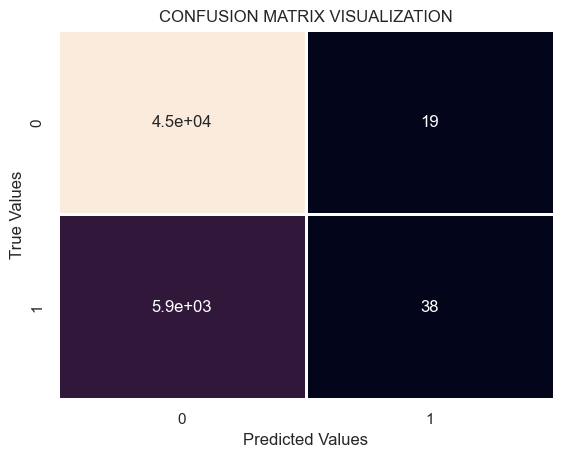

<Figure size 640x480 with 0 Axes>

In [44]:
from sklearn.metrics import confusion_matrix


conf = confusion_matrix(y_test,y_pred)
print(conf)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()
plt.savefig('fig8.png')